# Thermal Expansion for BB84 H gate for 1 

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
backend.properties()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(T1,T2):
    #T1 = 188610 # in nano second, 188.61 us
    #T2 = 191630 # in nano second, 191.63 us
    time_measure =4977.778
    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    return noise_model

In [3]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random
y_list=[]
#data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(20):
    data=100
    ##########################################################################
    h=1
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=100
    for i in range(n):
        m=m+1
        #print("No of identity Gate:",m)
        if digits[i] == 1:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.x(0)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(m):
                qc.delay(1,unit='us')
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=8192,noise_model=make_noise_therm(188610,191630)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
            itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            for key, value in counts.items():
                if value == itemMaxValue[1]:
                    bob_bits.append(value/8192)
    y_list.append(bob_bits)
    print(bob_bits)
    print("")
print(y_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


[0.972900390625, 0.9775390625, 0.969482421875, 0.9752197265625, 0.97216796875, 0.9757080078125, 0.9736328125, 0.9735107421875, 0.9736328125, 0.9749755859375, 0.972412109375, 0.9764404296875, 0.9747314453125, 0.97265625, 0.975341796875, 0.9739990234375, 0.9710693359375, 0.976806640625, 0.9747314453125, 0.9736328125, 0.973388671875, 0.9739990234375, 0.9757080078125, 0.9739990234375, 0.9747314453125, 0.977294921875, 0.9742431640625, 0.971435546875, 0.97216796875, 0.9732666015625, 0.9747314453125, 0.9737548828125, 0.9732666015625, 0.9739990234375, 0.974609375, 0.971923828125, 0.9761962890625, 0.9757080078125, 0.9722900390625, 0.9720458984375, 0.9744873046875, 0.9722900390625, 0.9755859375, 0.

20 Times Average

In [7]:
from statistics import mean
y=y_list
print(*map(mean, zip(*y)))

0.974359130859375 0.97413330078125 0.973638916015625 0.97425537109375 0.97333984375 0.9741455078125 0.974224853515625 0.973956298828125 0.974383544921875 0.9739013671875 0.974420166015625 0.973333740234375 0.974200439453125 0.97373046875 0.973822021484375 0.973675537109375 0.9733642578125 0.973699951171875 0.974371337890625 0.974005126953125 0.974224853515625 0.973846435546875 0.974139404296875 0.974346923828125 0.9736572265625 0.97353515625 0.9734375 0.97333984375 0.9741943359375 0.974139404296875 0.97427978515625 0.97425537109375 0.97376708984375 0.9738037109375 0.9742919921875 0.973919677734375 0.9740234375 0.973992919921875 0.97376708984375 0.9741455078125 0.973553466796875 0.973834228515625 0.974102783203125 0.97430419921875 0.974200439453125 0.97305908203125 0.97445068359375 0.97381591796875 0.973321533203125 0.9735595703125 0.973931884765625 0.97403564453125 0.9736572265625 0.973297119140625 0.974566650390625 0.9743896484375 0.974066162109375 0.974359130859375 0.973828125 0.9732

Map Plotting

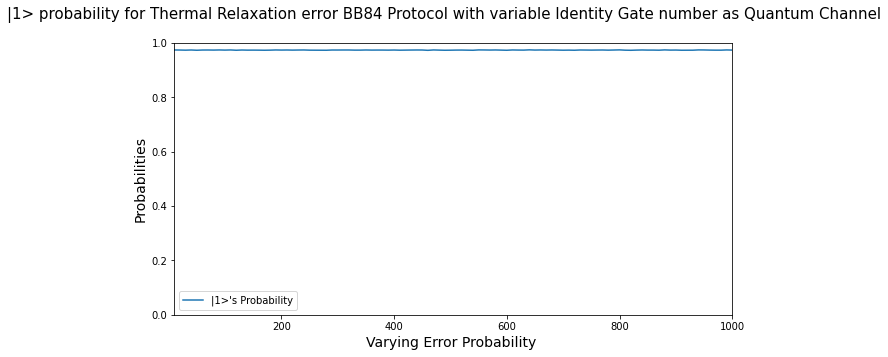

<Figure size 576x360 with 0 Axes>

In [8]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|1> probability for Thermal Relaxation error BB84 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.974359130859375,0.97413330078125,0.973638916015625,0.97425537109375,0.97333984375,0.9741455078125,0.974224853515625,0.973956298828125,0.974383544921875,0.9739013671875,0.974420166015625,0.973333740234375,0.974200439453125,0.97373046875,0.973822021484375,0.973675537109375,0.9733642578125,0.973699951171875,0.974371337890625,0.974005126953125,0.974224853515625,0.973846435546875,0.974139404296875,0.974346923828125,0.9736572265625,0.97353515625,0.9734375,0.97333984375,0.9741943359375,0.974139404296875,0.97427978515625,0.97425537109375,0.97376708984375,0.9738037109375,0.9742919921875,0.973919677734375,0.9740234375,0.973992919921875,0.97376708984375,0.9741455078125,0.973553466796875,0.973834228515625,0.974102783203125,0.97430419921875,0.974200439453125,0.97305908203125,0.97445068359375,0.97381591796875,0.973321533203125,0.9735595703125,0.973931884765625,0.97403564453125,0.9736572265625,0.973297119140625,0.974566650390625,0.9743896484375,0.974066162109375,0.974359130859375,0.973828125,0.973297119140625,0.974395751953125,0.97401123046875,0.9738525390625,0.974822998046875,0.974041748046875,0.974383544921875,0.9740478515625,0.974346923828125,0.973956298828125,0.973529052734375,0.97379150390625,0.973382568359375,0.97427978515625,0.974072265625,0.973846435546875,0.974072265625,0.974249267578125,0.9737060546875,0.9741943359375,0.974676513671875,0.973577880859375,0.973199462890625,0.973876953125,0.974334716796875,0.97391357421875,0.9739013671875,0.97352294921875,0.97462158203125,0.973870849609375,0.97406005859375,0.973382568359375,0.973480224609375,0.973529052734375,0.974560546875,0.9743896484375,0.9739013671875,0.97366943359375,0.973626708984375,0.974481201171875,0.97393798828125]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|1>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()

In [ ]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|1> probability for Thermal Relaxation error BB84 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0.5,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.974359130859375,0.97413330078125,0.973638916015625,0.97425537109375,0.97333984375,0.9741455078125,0.974224853515625,0.973956298828125,0.974383544921875,0.9739013671875,0.974420166015625,0.973333740234375,0.974200439453125,0.97373046875,0.973822021484375,0.973675537109375,0.9733642578125,0.973699951171875,0.974371337890625,0.974005126953125,0.974224853515625,0.973846435546875,0.974139404296875,0.974346923828125,0.9736572265625,0.97353515625,0.9734375,0.97333984375,0.9741943359375,0.974139404296875,0.97427978515625,0.97425537109375,0.97376708984375,0.9738037109375,0.9742919921875,0.973919677734375,0.9740234375,0.973992919921875,0.97376708984375,0.9741455078125,0.973553466796875,0.973834228515625,0.974102783203125,0.97430419921875,0.974200439453125,0.97305908203125,0.97445068359375,0.97381591796875,0.973321533203125,0.9735595703125,0.973931884765625,0.97403564453125,0.9736572265625,0.973297119140625,0.974566650390625,0.9743896484375,0.974066162109375,0.974359130859375,0.973828125,0.973297119140625,0.974395751953125,0.97401123046875,0.9738525390625,0.974822998046875,0.974041748046875,0.974383544921875,0.9740478515625,0.974346923828125,0.973956298828125,0.973529052734375,0.97379150390625,0.973382568359375,0.97427978515625,0.974072265625,0.973846435546875,0.974072265625,0.974249267578125,0.9737060546875,0.9741943359375,0.974676513671875,0.973577880859375,0.973199462890625,0.973876953125,0.974334716796875,0.97391357421875,0.9739013671875,0.97352294921875,0.97462158203125,0.973870849609375,0.97406005859375,0.973382568359375,0.973480224609375,0.973529052734375,0.974560546875,0.9743896484375,0.9739013671875,0.97366943359375,0.973626708984375,0.974481201171875,0.97393798828125]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|1>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()